# Unsupervised Learning


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data  = pd.read_csv('wdbc.data.csv', header = None).drop(0,1)

In [4]:
data[1] = data[1].map({'M': 1, 'B': 0})

In [5]:
test_M = data[data[1]==1].head(42)
train_M = data[data[1]==1].tail(170)

In [6]:
test_B = data[data[1]==0].head(71)
train_B = data[data[1]==0].tail(286)

In [7]:
train = pd.concat([train_M,train_B],ignore_index= True)
rawdata = train.drop(1,1)
labels = train[[1]]

In [8]:
test = pd.concat([test_M,test_B],ignore_index= True)

In [9]:
test_label = test[[1]]
rawtest = test.drop(1,1)

### A

In [10]:
kmeans = KMeans(n_clusters=2, n_init = 1000,init = 'random').fit(rawdata)

#### n_init means: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Using a high number of it, we can avoid local minimum.

In [11]:
centers = kmeans.cluster_centers_

In [12]:
centers

array([[1.98328155e+01, 2.20458252e+01, 1.31133981e+02, 1.23951262e+03,
        1.00774563e-01, 1.46076990e-01, 1.79214466e-01, 1.02445922e-01,
        1.88804854e-01, 5.98391262e-02, 7.58630097e-01, 1.24012524e+00,
        5.32242718e+00, 9.99986408e+01, 6.57149515e-03, 3.17836602e-02,
        4.24321359e-02, 1.56211165e-02, 2.01890291e-02, 3.86287379e-03,
        2.41039806e+01, 2.92028155e+01, 1.60792233e+02, 1.80873786e+03,
        1.38114951e-01, 3.44437476e-01, 4.41616505e-01, 1.90852136e-01,
        3.03223301e-01, 8.40351456e-02],
       [1.27152210e+01, 1.87690085e+01, 8.21469972e+01, 5.08900567e+02,
        9.37774504e-02, 8.97041076e-02, 6.14283278e-02, 3.34804533e-02,
        1.76726912e-01, 6.28637960e-02, 3.06482153e-01, 1.22064873e+00,
        2.18087337e+00, 2.45273513e+01, 7.11910765e-03, 2.29501615e-02,
        2.74518487e-02, 1.04810482e-02, 2.03757110e-02, 3.58808584e-03,
        1.42301586e+01, 2.49437960e+01, 9.31765722e+01, 6.37699717e+02,
        1.28824788e-01,

In [13]:
#closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, rawdata)

In [14]:
distance = kmeans.transform(rawdata) # the distances between all data points to the 2 centers

In [15]:
# for cluster 0
d = distance[:, 0]
ind_0 = np.argsort(d)[::-1][:30]

In [16]:
ind_0

array([145, 432, 431, 265, 455, 183, 421, 258, 268, 296, 406, 446, 319,
       336, 193, 417, 407, 450, 213, 197, 283, 339, 372, 232, 449, 441,
        50, 440, 286, 448])

In [17]:
label_0 = list()
for i in ind_0:
    label_0.append(labels[1][i])
    
label_0 # thus the first cluster is 0
res_0 = max(set(label_0), key = label_0.count)

In [18]:
# for cluster 1
d = distance[:, 1]
ind_1 = np.argsort(d)[::-1][:30]

In [19]:
ind_1

array([145,  50, 117,  96,  68, 121, 114,  78, 154, 160,  14,  44,  97,
        25,  73,  30, 122,  63,  43, 130, 166,  51,   3, 142,  82, 104,
        72, 125, 108,  85])

In [20]:
label_1 = list()
for i in ind_1:
    label_1.append(labels[1][i])
    
label_1 # thus the second cluster is 1
res_1 = max(set(label_1), key = label_1.count)

In [21]:
def get_label_foreachcluster(distance,labels):
    d_0 = distance[:, 0]# for the first cluster
    ind_0 = np.argsort(d_0)[::-1][:30]
    label_0 = list()
    for i in ind_0:
        label_0.append(labels[1][i])
    
    label_0 # thus the first cluster is 0
    res_0 = max(set(label_0), key = label_0.count)
    d_1 = distance[:, 1]
    ind_1 = np.argsort(d_1)[::-1][:30]
    label_1 = list()
    for i in ind_1:
        label_1.append(labels[1][i])
    
    label_1 # thus the second cluster is 1
    res_1 = max(set(label_1), key = label_1.count)
    
    
    return (res_0,res_1)

In [22]:
res_0,res_1 =get_label_foreachcluster(distance,labels)
res_0

0

In [23]:
result = kmeans.predict(rawdata)

In [24]:
result = pd.DataFrame(result)

In [25]:
km_res = result[0].map({0: res_0, 1: res_1}) # final labels from results of kmeans 

In [26]:
confusion_matrix(labels, km_res)

array([[  1, 285],
       [102,  68]])

In [27]:
fpr, tpr, threshold = metrics.roc_curve(labels, km_res)
roc_auc = metrics.auc(fpr, tpr)

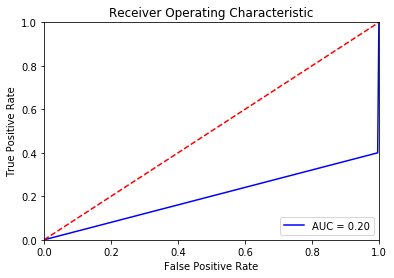

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
i = 1
accuracy = 0
precision = 0
recall = 0
f_1 = 0
AUC =0

for i in range(1 , 31 ,1):
    kmeans = KMeans(n_clusters=2, n_init = 1000,init = 'random').fit(rawdata)
    distance = kmeans.transform(rawdata) 
    res_0,res_1 =get_label_foreachcluster(distance,labels)
    km_res = result[0].map({0: res_0, 1: res_1})
    accuracy = accuracy + accuracy_score(labels, km_res)
    precision = precision + precision_score(labels, km_res, average='binary')
    recall = recall + recall_score(labels, km_res, average='binary')
    f_1 = f_1+ f1_score(labels, km_res, average='binary') 
    fpr, tpr, thresholds = metrics.roc_curve(labels, km_res, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    AUC = AUC + auc
    
print('accuracy for training data', accuracy/30)
print('precision for training data', precision/30)
print('recall for training data', recall/30)
print('f1_score for training data ', f_1/30)
print('AUC for training data', AUC/30)
    
    

accuracy for training data 0.5929824561403508
precision for training data 0.6978171383518068
recall for training data 0.5266666666666666
f1_score for training data  0.5686074282632597
AUC for training data 0.5795337995337996


In [30]:
i = 1
accuracy = 0
precision = 0
recall = 0
f_1 = 0
AUC =0

for i in range(1,31,1):
    kmeans = KMeans(n_clusters=2,n_init = 1000,init = 'random').fit(rawdata)
    distance = kmeans.transform(rawdata) 
    res_0,res_1 =get_label_foreachcluster(distance,labels)
    test_result = kmeans.predict(rawtest)
    test_result = pd.DataFrame(test_result)
    km_test = test_result[0].map({0: res_0, 1: res_1})
    accuracy = accuracy + accuracy_score(test_label, km_test)
    precision = precision + precision_score(test_label, km_test, average='binary')
    recall = recall + recall_score(test_label, km_test, average='binary')
    f_1 = f_1+ f1_score(test_label, km_test, average='binary') 
    fpr, tpr, thresholds = metrics.roc_curve(test_label, km_test, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    AUC = AUC + auc
    
print('accuracy for testing data', accuracy/30)
print('precision for testing data', precision/30)
print('recall for testing data', recall/30)
print('f1_score for testing data ', f_1/30)
print('AUC for testing data', AUC/30)
    
    

accuracy for testing data 0.19469026548672558
precision for testing data 0.23655913978494608
recall for testing data 0.5238095238095238
f1_score for testing data  0.32592592592592595
AUC for testing data 0.2619047619047619


In [31]:
#test_result = kmeans.predict(rawtest)

In [34]:
#test_result = pd.DataFrame(test_result)

In [36]:
#km_test = test_result[0].map({0: res_0, 1: res_1})

In [31]:
confusion_matrix(test_label, km_test)

array([[ 0, 71],
       [20, 22]])

In [32]:
fpr, tpr, threshold = metrics.roc_curve(test_label, km_test)
roc_auc = metrics.auc(fpr, tpr)

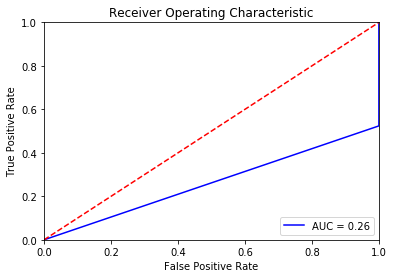

In [33]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Spectral Clustering

### Spectral clustering is a techniques that make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

In [75]:
from sklearn import manifold
import heapq
from heapq import heappush, heappop,nsmallest

In [76]:
df = pd.read_csv('wdbc.data.csv',header = None)

In [77]:
data_pos = df[df[1].isin(['M'])]
data_neg = df[df[1].isin(['B'])]

In [78]:
data_pos[1] = data_pos[1].replace('M',1,regex=True)
data_neg[1] = data_neg[1].replace('B',0,regex=True)
data_pos1 = data_pos.iloc[:,2:]
data_pos1[1] = data_pos[1]
data_neg1 = data_neg.iloc[:,2:]
data_neg1[1] = data_neg[1]
X_train_M4, X_test_M4, y_train_M4, y_test_M4 = train_test_split(data_pos1.iloc[:,:-1],data_pos1.iloc[:,-1], test_size=0.2, random_state=10, shuffle=True)
X_train_B4, X_test_B4, y_train_B4, y_test_B4 = train_test_split(data_neg1.iloc[:,:-1],data_neg1.iloc[:,-1], test_size=0.2, random_state=10, shuffle=True)
X_train4 = pd.concat([X_train_M4,X_train_B4])
y_train4 = pd.concat([y_train_M4,y_train_B4])
X_test4 = pd.concat([X_test_M4,X_test_B4])
y_test4 = pd.concat([y_test_M4,y_test_B4])
 


/Users/wangyuying/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/wangyuying/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
x_train_sc = manifold.SpectralEmbedding(n_components=2).fit_transform(X_train4)
x_test_sc = manifold.SpectralEmbedding(n_components=2).fit_transform(X_test4)
kmeans1 = KMeans(n_clusters=2,init='random',n_init=20).fit(x_train_sc)
d0_sc = kmeans1.transform(x_train_sc)[:, 0]
ind0_sc = np.argsort(d0_sc)[::][:30].tolist()
l0_sc = y_train4.iloc[ind0_sc].tolist()
pol0_sc = max(set(l0_sc), key = l0_sc.count)#find the 30 nearest distance to center1 in x_train_sc


d1_sc = kmeans1.transform(x_train_sc)[:, 1]
ind1_sc = np.argsort(d1_sc)[::][:30].tolist()
l1_sc = y_train4.iloc[ind1_sc].tolist()
pol1_sc = max(set(l1_sc), key = l1_sc.count)
y_train_pred1 = kmeans1.predict(x_train_sc)#find the 30 nearest distance to center2

for n in range(len(y_train_pred1)):
    if(y_train_pred1[n] == 0):
        y_train_pred1[n] = pol0_sc# sign 
    elif(y_train_pred1[n] == 1):
        y_train_pred1[n] = pol1_sc

pre_test1 = kmeans1.predict(x_test_sc)
for n in range(len(pre_test1)):
    if(pre_test1[n] == 0):
        pre_test1[n] = pol0_sc
    elif(pre_test1[n] == 1):
        pre_test1[n] = pol1_sc

In [80]:
confusion_matrix(y_train4, y_train_pred1)

array([[282,   3],
       [ 53, 116]])

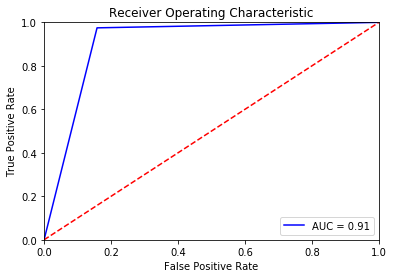

In [81]:
roc_auc = roc_auc_score(y_train_pred1,y_train4)
fpr, tpr, thresholds = roc_curve(y_train_pred1,y_train4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
confusion_matrix(y_test4, pre_test1)

array([[31, 41],
       [43,  0]])

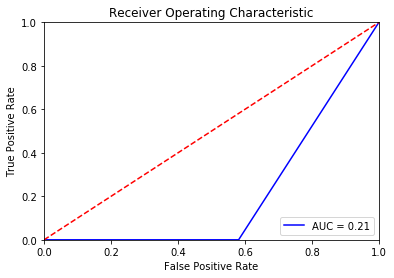

In [83]:
roc_auc = roc_auc_score(pre_test1,y_test4)
fpr, tpr, thresholds = roc_curve(pre_test1,y_test4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
train_acc=[]
test_acc=[]
train_precision=[]
test_precision=[]
train_recall=[]
test_recall=[]
train_fscore=[]
test_fscore=[]
train_auc=[]
test_auc=[]

for i in range(0,10):
    X_train_M4, X_test_M4, y_train_M4, y_test_M4 = train_test_split(data_pos1.iloc[:,:-1],data_pos1.iloc[:,-1], test_size=0.2, random_state=i, shuffle=True)
    X_train_B4, X_test_B4, y_train_B4, y_test_B4 = train_test_split(data_neg1.iloc[:,:-1],data_neg1.iloc[:,-1], test_size=0.2, random_state=i, shuffle=True)
    X_train4 = pd.concat([X_train_M4,X_train_B4])
    y_train4 = pd.concat([y_train_M4,y_train_B4])
    X_test4 = pd.concat([X_test_M4,X_test_B4])
    y_test4 = pd.concat([y_test_M4,y_test_B4])
    
    dis_train = manifold.SpectralEmbedding(n_components=2).fit_transform(X_train4)
    dis_test = manifold.SpectralEmbedding(n_components=2).fit_transform(X_test4)
    
    
    k_model = KMeans(n_clusters=2,init='random',random_state=i,n_init = 20).fit(dis_train)
    d0 = k_model.transform(dis_train)[:, 1]
    dis_30_1 = np.argsort(d0)[::][:30].tolist()
    l0= y_train4.iloc[dis_30_1].tolist()
    pol0_sc = max(set(l0), key = l0.count)
    #find the 30 nearest distance to center1 in x_train_un
    
    d1 = k_model.transform(dis_train)[:, 0]
    dis_30_2 = np.argsort(d1)[::][:30].tolist()
    l1 = y_train4.iloc[dis_30_2].tolist()
    pol1_sc = max(set(l1), key = l1.count)#find the 30 nearest distance to center2 
    
    pre_train4 = k_model.predict(dis_train)
    for n in range(len(pre_train4)):
        if(pre_train4[n] == 0):
            pre_train4[n] = pol0_sc
        elif(pre_train4[n] == 1):
            pre_train4[n] = pol1_sc
    pre_test4 = k_model.predict(dis_test)
    for n in range(len(pre_test4)):
        if(pre_test4[n] == 0):
            pre_test4[n] = pol0_sc
        elif(pre_test4[n] == 1):
            pre_test4[n] = pol1_sc
            
    train_acc.append(accuracy_score(y_train4,pre_train4))
    test_acc.append(accuracy_score(y_test4,pre_test4))
    train_precision.append(precision_score(y_train4,pre_train4))
    test_precision.append(precision_score(y_test4,pre_test4))
    train_recall.append(recall_score(y_train4,pre_train4))
    test_recall.append(recall_score(y_test4,pre_test4))
    train_fscore.append(f1_score(y_train4,pre_train4))
    test_fscore.append(f1_score(y_test4,pre_test4))
    train_auc.append(roc_auc_score(y_train4,pre_train4))
    test_auc.append(roc_auc_score(y_test4,pre_test4)) # be tought by my friend

In [85]:
print("for training data:")
print("Average Accuracy:",np.mean(train_acc))
print("Average Precision:",np.mean(train_precision))
print("Average Recall:",np.mean(train_recall))
print("Average f1:",np.mean(train_fscore))
print("Average AUC:",np.mean(train_auc))

for training data:
Average Accuracy: 0.11872246696035242
Average Precision: 0.15387495049860397
Average Recall: 0.30414201183431955
Average f1: 0.2043548862634934
Average AUC: 0.1564569708294405


In [86]:
print("for testing  data:")
print("Average Accuracy:",np.mean(test_acc))
print("Average Precision:",np.mean(test_precision))
print("Average Recall:",np.mean(test_recall))
print("Average f1:",np.mean(test_fscore))
print("Average AUC:",np.mean(test_auc))

for testing  data:
Average Accuracy: 0.5365217391304348
Average Precision: 0.4602679569699887
Average Recall: 0.7209302325581395
Average f1: 0.5527094388762712
Average AUC: 0.5736595607235142
